two-level L96 model

each of the N slow variables is coupled to M fast variables, 

so in total the model is N + M*N dimensional

parameter values directly from Lorenz96 paper 

In [1]:
using DifferentialEquations
using Plots
using LinearAlgebra
using StatsBase

In [2]:
A = rand(10,20)

10×20 Array{Float64,2}:
 0.480945   0.611278   0.635163  0.28883    …  0.116606   0.218947  0.0891608
 0.061167   0.340075   0.602016  0.707059      0.0555958  0.192655  0.882575
 0.624233   0.474382   0.637863  0.380321      0.539566   0.553918  0.256508
 0.642431   0.759144   0.804543  0.824207      0.751746   0.131686  0.804807
 0.0559626  0.571014   0.374187  0.430517      0.238017   0.663134  0.517735
 0.453916   0.904449   0.429374  0.757448   …  0.670788   0.332445  0.940608
 0.0825385  0.523081   0.69787   0.0234539     0.610829   0.963466  0.351985
 0.51131    0.740273   0.819809  0.385081      0.270009   0.22252   0.989558
 0.566869   0.0210167  0.255942  0.215415      0.617079   0.907556  0.953786
 0.98952    0.315923   0.80704   0.175822      0.439572   0.395721  0.852154

In [3]:
sum(A,dims=2)

10×1 Array{Float64,2}:
  8.984046935114677
  8.816265335981639
 10.330718036046179
  9.977591675489185
 10.209018491432367
 11.46869057964979
 11.13246889866404
 13.043184251086165
  9.222300604253821
 11.835337137759197

In [4]:
const N = 10
const M = 10

10

In [5]:
function twolevel_l96!(du,u,p,t)
    F,h,c,b = p 
    X = @view u[:,1]
    Y = @view u[:,2:end] 
    hcb = h*c/b
    
    # boundary conditions solved by circular shift
    du[:,1] .= (-1 .*(circshift(X,-1) .- circshift(X,2)).*circshift(X,1) .- X .+ F .- hcb*sum(Y,dims=2))[:]
    
    # boundary conditions are complicaded for the fast variable....
    du[1,2] = -c*b*(Y[1,2] - Y[N,M-1])*Y[N,M] - c*Y[1,1] + hcb*X[1]
    du[1,3] = -c*b*(Y[1,3] - Y[N,M])*Y[1,1] - c*Y[1,2] + hcb*X[1]
    for j=3:M-1
        du[1,j+1] = -c*b*(Y[1,j+1] - Y[1,j-2])*Y[1,j-1] - c*Y[1,j] + hcb*X[1]
    end 
    du[1,M+1] = -c*b*(Y[2,1] - Y[1,M-2])*Y[1,M-1] - c*Y[1,M] + hcb*X[1]
    
    for i=2:N-1    
        du[i,2] = -c*b*(Y[i,2] - Y[i-1,M-1])*Y[i-1,M] - c*Y[i,1] + hcb*X[i]
        du[i,3] = -c*b*(Y[i,3] - Y[i-1,M])*Y[i,1] - c*Y[i,2] + hcb*X[i]
        for j=3:M-1
            du[i,j+1] = -c*b*(Y[i,j+1] - Y[i,j-2])*Y[i,j-1] - c*Y[i,j] + hcb*X[i]
        end 
        du[i,M+1] = -c*b*(Y[i+1,1] - Y[i,M-2])*Y[i,M-1] - c*Y[i,M] + hcb*X[i]
    end
    
    du[N,2] = -c*b*(Y[N,2] - Y[N-1,M-1])*Y[N-1,M] - c*Y[N,1] + hcb*X[N]
    du[N,3] = -c*b*(Y[N,3] - Y[N-1,M])*Y[N,1] - c*Y[N,2] + hcb*X[N]
    for j=3:M-1
        du[N,j+1] = -c*b*(Y[N,j+1] - Y[N,j-2])*Y[N,j-1] - c*Y[N,j] + hcb*X[N]
    end 
    du[N,M+1] = -c*b*(Y[1,1] - Y[N,M-2])*Y[N,M-1] - c*Y[N,M] + hcb*X[N]
    
end

    


twolevel_l96! (generic function with 1 method)

In [6]:
F = 10. # forcing, 10 -> chaotic 
h = 1. # coupling 
c = 10. # time scale separation
b = 10. # amplitude scale seperation 

pars = [F,h,c,b]
u0 = rand(N,M+1)

prob = ODEProblem(twolevel_l96!, u0, (0.,500.), pars)

ODEProblem with uType Array{Float64,2} and tType Float64. In-place: true
timespan: (0.0, 500.0)
u0: [0.5533037537286634 0.788548653279517 … 0.9450768567309058 0.8058832567990544; 0.40843501452076114 0.23549500187766292 … 0.5963177039439413 0.6700332790730588; … ; 0.6488898044843068 0.8813387089755196 … 0.5135592134855897 0.1922335284840173; 0.0017557345074450392 0.427440317614888 … 0.6740966393470953 0.11188780840645962]

In [7]:
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 27139-element Array{Float64,1}:
   0.0
   0.0037895078198563023
   0.007228783061502707
   0.011850943059774095
   0.01679629610739474
   0.02220016503582664
   0.027722876975727662
   0.03336720714610425
   0.04001105103470424
   0.04669637917189426
   0.05401679309820279
   0.06148780763252168
   0.06956817123017918
   ⋮
 499.83223377899674
 499.8480252267144
 499.8649470441897
 499.87826829774843
 499.8960825608278
 499.91052336291847
 499.92939495174875
 499.94715667164184
 499.96696839697796
 499.9824716171485
 499.9982135084372
 500.0
u: 27139-element Array{Array{Float64,2},1}:
 [0.5533037537286634 0.788548653279517 … 0.9450768567309058 0.8058832567990544; 0.40843501452076114 0.23549500187766292 … 0.5963177039439413 0.6700332790730588; … ; 0.6488898044843068 0.8813387089755196 … 0.5135592134855897 0.1922335284840173; 0.0017557345074450392 0.427440317614888 … 0.6740966393470953 0.11188780840645962]
 [0.5681

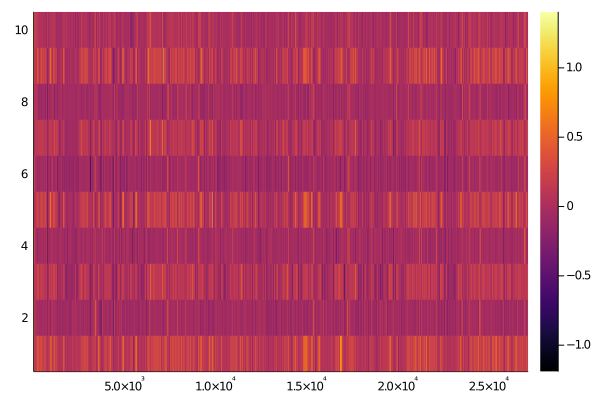

In [8]:
soli = Array(sol);

heatmap(soli[1,2:end,:])

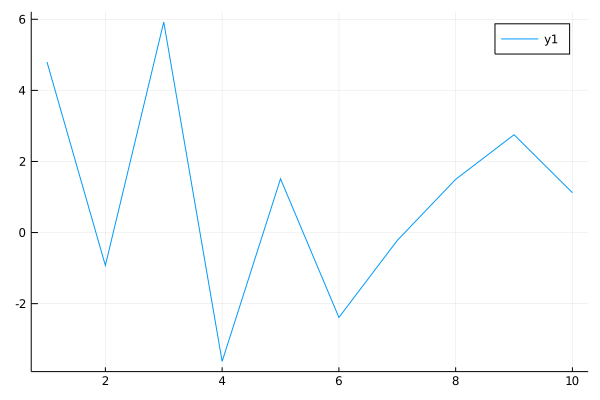

In [13]:
plot(soli[:,1,8000])